In [1]:
# setup gdrive
import configparser
from google.colab import drive
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Visualization/Data/'
path_img = '/content/gdrive/My Drive/Visualization/Images/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Basic scatter plot
- Multiple colors/shapes for different groups

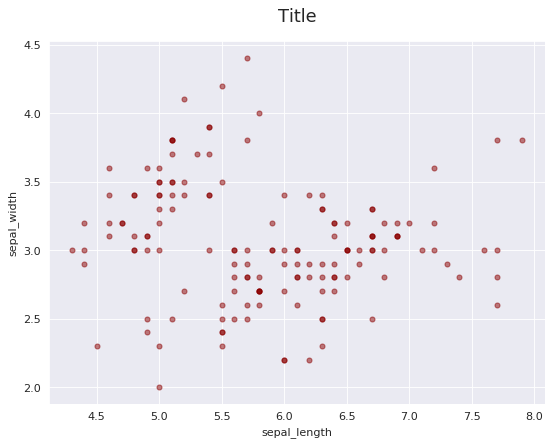

In [2]:
# loading and preparing data
df = sns.load_dataset('iris')

# color labels setting 
color = ['darkgrid', 'darkred']

# background setting 
sns.set_style(color[0]) 

# plot size setting
fig, ax = plt.subplots(figsize = (8,6), dpi=80)

# drawing plot
# define shape of marker
# adding a regression fitting line
# scatter_kws defines color, transparency, and size
# without regression fit
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], marker=None, fit_reg=False, scatter_kws={"color":color[1],"alpha":0.5,"s":20})

# title and size
ax.set_title('Title',fontsize=16,pad = 18)

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'scatter.pdf', bbox_inches='tight')
# show the image
plt.show()

<Figure size 1280x800 with 0 Axes>

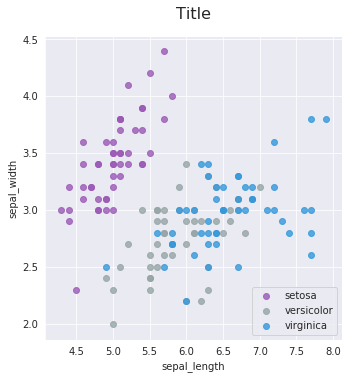

In [0]:
# loading and preparing data
df = sns.load_dataset('iris')

# color labels setting 
color = ['darkgrid', '#9b59b6','#3498db', '#95a5a6']

# background setting 
sns.set_style(color[0]) 

# plot size setting 
plt.figure(figsize=(16,10), dpi= 80)

# hue: the argument to provide a factor variable for each group
# maker defines marker for each group
# palette: can change to another palette, or define the color for each group
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species',  legend=False,
           palette=dict(setosa=color[1], virginica=color[2], versicolor=color[3])
           )

# title and size
plt.title("Title", fontsize=16,pad = 18)

# legend and position
plt.legend(loc='lower right')

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'scatter_multi.pdf', bbox_inches='tight')
# show the image
plt.show()

<Figure size 640x480 with 0 Axes>

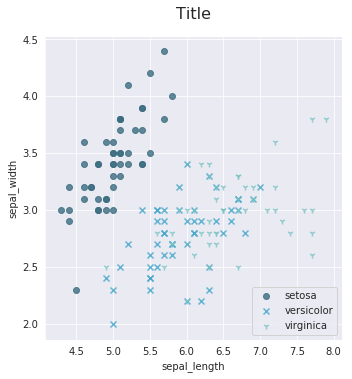

In [0]:
# loading and preparing data
df = sns.load_dataset('iris')

# color labels setting 
color = ['darkgrid', 'GnBu_d']

# background setting 
sns.set_style(color[0]) 

# plot size setting 
plt.figure(figsize=(8,6), dpi= 80)

# define different markers for different groups
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue="species",  legend=False,
           markers=["o", "x", "1"],
           palette = color[1])

# title and size
plt.title("Title", fontsize=16,pad = 18)

# legend and position
plt.legend(loc='lower right')

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'scatter_multimarkers.pdf', bbox_inches='tight')
# show the image
plt.show()

## Correlogram
To represent correlations between variables
- With/without regression line

<Figure size 640x480 with 0 Axes>

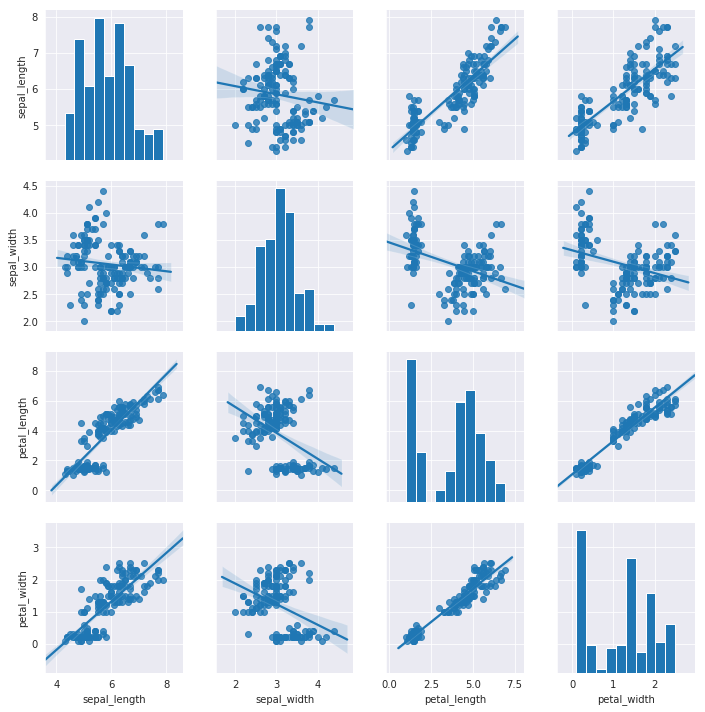

In [0]:
# loading and preparing data
df = sns.load_dataset('iris')

# color labels setting 
color = ['darkgrid']

# background setting 
sns.set_style(color[0]) 

# plot size setting 
plt.figure(figsize=(8,6), dpi= 80)

# drawing plot with regression
correlogram = sns.pairplot(df, kind="reg")

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'scatterandhistogram.pdf', bbox_inches='tight')
# show the image
plt.show()

<Figure size 640x480 with 0 Axes>

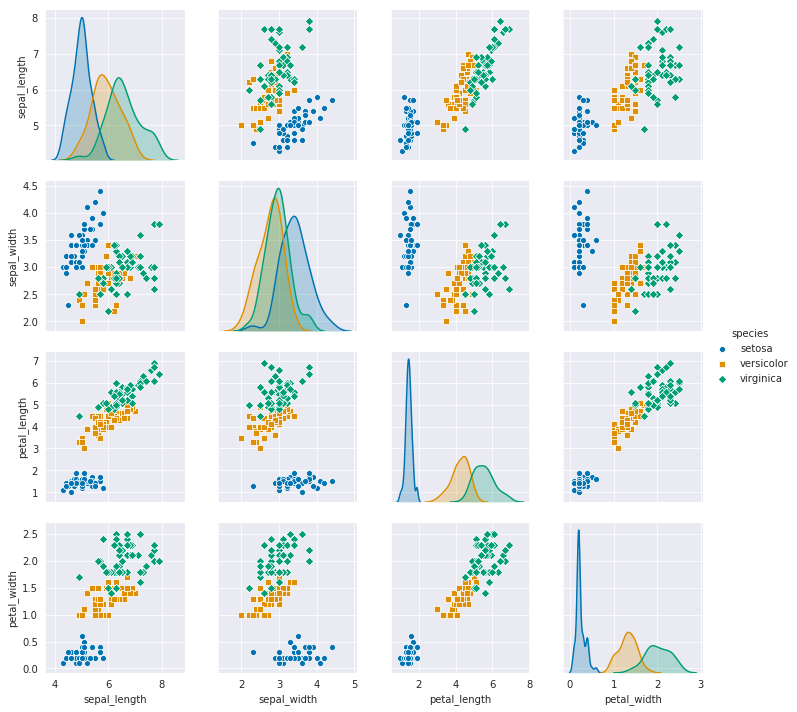

In [0]:
# loading and preparing data
df = sns.load_dataset('iris')

# color labels setting 
color = ['darkgrid']

# background setting 
sns.set_style(color[0]) 

# plot size setting 
plt.figure(figsize=(8,6), dpi= 80)

# optional argument,  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5)
# palette="Set2"
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="colorblind")

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'scatterandhistogram_multimarks.pdf', bbox_inches='tight')
# showing the image
plt.show()